# Analyses of multiple large populations using SAMPLED DATA

In [1]:
import pickle
import gzip
import numpy as np
import pandas as pd
from scipy import stats
from tqdm import tqdm

import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from ThesisScripts.MyModel import *
from ThesisScripts.Analyses import *

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

#matplotlib preamble, taken from http://blog.juliusschulz.de/blog/ultimate-ipython-notebook
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

## Load data

In [4]:
%%time

# NEUTRAL POPULATIONS
prefix = '../../Simulations/Ensemble-simulations/saved_simulations/large-neutral-1000_MultiSim/'
neutral = []

for i in tqdm(range(1000)):
    file_path = prefix + 'population_' + '%s' %(i) + '.pkl.gz'
    data = pd.read_pickle(file_path, compression='gzip')
    neutral.append(data)
print(len(neutral))
print(type(neutral[0]))

100%|██████████| 1000/1000 [03:09<00:00,  5.28it/s]

1000
<class 'pandas.core.frame.DataFrame'>
CPU times: user 1min 49s, sys: 55.4 s, total: 2min 44s
Wall time: 3min 9s


In [5]:
neutral[0].head()

,Birthday,q,Final size,Family size,Allele frequency,Mutations,Children,Weight,RGB color
Clone ID,,,,,,,,,
A,0,0.001,114397059,116402657,1.000000,0,163655,1,"(0, 0, 0)"
A.0,13,0.001,217569,218763,0.001879,1,320,1,"(180, 71, 96)"
A.1,14,0.001,222672,224543,0.001929,1,324,1,"(209, 175, 109)"
A.2,14,0.001,80251,80997,0.000696,1,122,1,"(216, 200, 232)"
A.3,14,0.001,65689,66143,0.000568,1,92,1,"(5, 107, 190)"


## Sample data

In [6]:
sample_size=10**6
detection_limit=100

In [7]:
%%time
for i in tqdm(range(len(neutral))):
    neutral[i] = sample(neutral[i], sample_size, detection_limit)
print(len(neutral))

100%|██████████| 1000/1000 [31:17<00:00,  1.88s/it]

1000
CPU times: user 30min 3s, sys: 44.7 s, total: 30min 48s
Wall time: 31min 17s


In [8]:
neutral[0].head()

,Birthday,q,Final size,Family size,Allele frequency,Mutations,Children,Weight,RGB color,sampled_size,sampled_fam_size,sampled_AF
Clone ID,,,,,,,,,,,,
A,0,0.001,114397059,116402657,1.000000,0,163655,1,"(0, 0, 0)",987483,1000000,1.000000
A.0,13,0.001,217569,218763,0.001879,1,320,1,"(180, 71, 96)",1889,1890,0.001890
A.1,14,0.001,222672,224543,0.001929,1,324,1,"(209, 175, 109)",1914,1918,0.001918
A.2,14,0.001,80251,80997,0.000696,1,122,1,"(216, 200, 232)",706,709,0.000709
A.3,14,0.001,65689,66143,0.000568,1,92,1,"(5, 107, 190)",575,576,0.000576


In [24]:
neutral[0].tail()

,Birthday,q,Final size,Family size,Allele frequency,Mutations,Children,Weight,RGB color,sampled_size,sampled_fam_size,sampled_AF
Clone ID,,,,,,,,,,,,
A.5828,29,0.001,111,111,9.535865e-07,1,0,1,"(103, 34, 11)",1,1,0.000001
A.5980,29,0.001,107,107,9.192230e-07,1,0,1,"(249, 166, 3)",2,2,0.000002
A.6101,29,0.001,149,149,1.280040e-06,1,0,1,"(182, 141, 88)",2,2,0.000002
A.6226,29,0.001,107,107,9.192230e-07,1,0,1,"(55, 212, 175)",1,1,0.000001
A.6397,29,0.001,129,129,1.108222e-06,1,0,1,"(241, 26, 95)",1,1,0.000001


## Maximum allele frequencies

In [9]:
%%time
neutral_MaxAFs = get_max_AFs(neutral, sampled=True)

CPU times: user 1.54 s, sys: 615 ms, total: 2.16 s
Wall time: 2.17 s


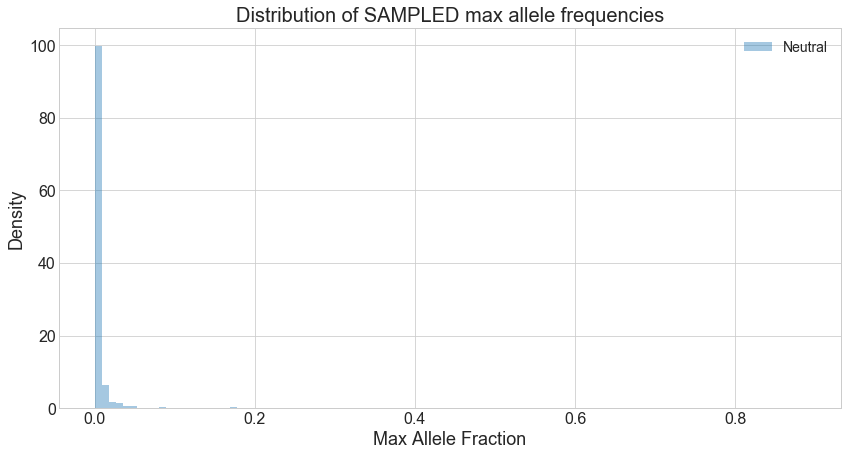

In [10]:
sns.distplot(neutral_MaxAFs, bins=100, norm_hist=True, kde=False, label="Neutral");
plt.title('Distribution of SAMPLED max allele frequencies');
plt.xlabel('Max Allele Fraction');
plt.ylabel('Density');
#plt.ylim(0, 5);
plt.legend();
plt.savefig('./Figures/SAMPLED-MultiSim-Large-1000_sim/SAMPLED-Large-neutral-MaxAFs.png')
plt.show()

## Heterogeneity

In [11]:
%%time
neutral_H = get_heterogeneity(neutral, sampled=True)

CPU times: user 1.05 s, sys: 10.8 ms, total: 1.06 s
Wall time: 1.06 s


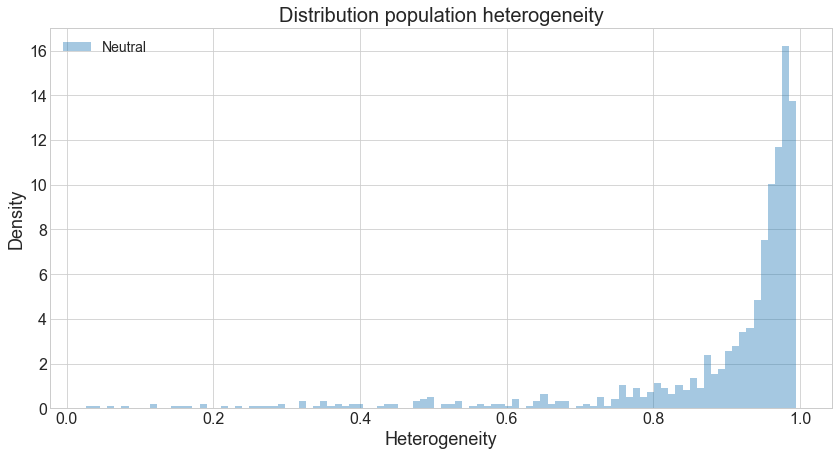

In [12]:
sns.distplot(neutral_H, bins=100, norm_hist=True, kde=False, label="Neutral");
plt.title('Distribution population heterogeneity');
plt.xlabel('Heterogeneity');
plt.ylabel('Density');
plt.legend();
plt.savefig('./Figures/SAMPLED-MultiSim-Large-1000_sim/SAMPLED-Large-neutral-Heterogeneity.png')
plt.show()

## Mutational burden (number of mutations distrbution)

In [13]:
%%time
neutral_mut_distr = get_mutation_distributions(neutral, sampled=True)

CPU times: user 54.4 s, sys: 316 ms, total: 54.7 s
Wall time: 54.7 s


In [14]:
neutral_mut_distr.to_csv('../Analysis-Data/SAMPLED-Large-1000_sim-neutral_mut_distr.csv')

In [15]:
neutral_avg_nmd = neutral_mut_distr.mean()
neutral_std_nmd = neutral_mut_distr.std()

In [16]:
%%time
neutral_avg_num_mut = avg_num_mutations(neutral_avg_nmd)

CPU times: user 631 µs, sys: 210 µs, total: 841 µs
Wall time: 683 µs


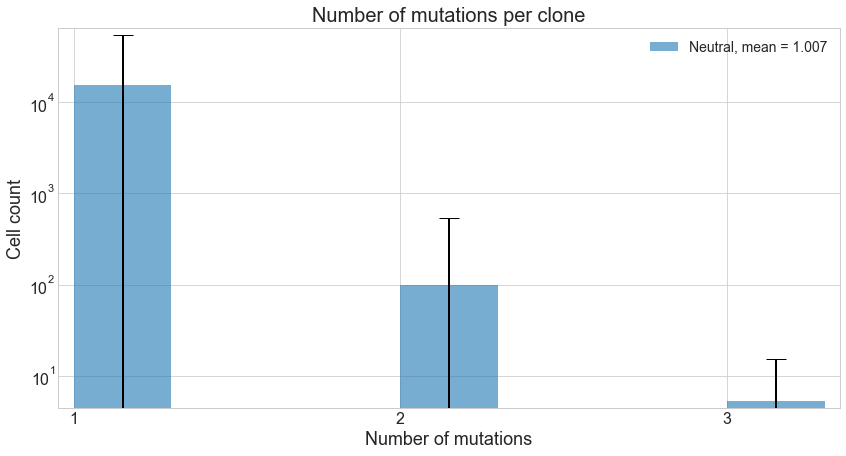

In [17]:
neutral_errors = neutral_std_nmd.values

plt.bar(left=neutral_avg_nmd.index+0.15, height=neutral_avg_nmd.values, width=0.3, alpha=0.6, 
        align='center', yerr=neutral_errors, capsize=10, 
        label="Neutral, mean = %s" %(round(neutral_avg_num_mut, 3)));

plt.title("Number of mutations per clone");
plt.xlabel('Number of mutations');
plt.ylabel('Cell count');
plt.yscale('log');
plt.xticks(list(neutral_avg_nmd.index));
plt.margins(0.02);
plt.legend();
plt.savefig('./Figures/SAMPLED-MultiSim-Large-1000_sim/SAMPLED-Large-neutral-Num_mutations.png')
plt.show()

## Total number of mutations

In [18]:
%%time
neutral_total_m = get_total_mutations(neutral, det_lim=1)

CPU times: user 640 ms, sys: 3.79 ms, total: 644 ms
Wall time: 642 ms


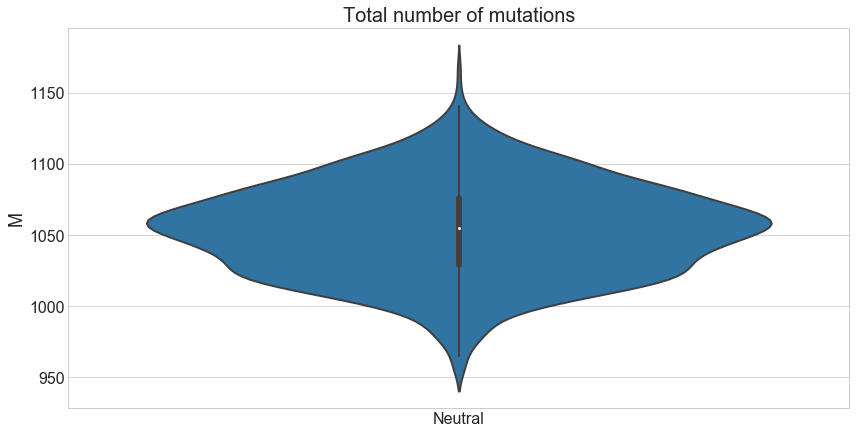

In [19]:
sns.violinplot(data=[neutral_total_m]);
plt.title("Total number of mutations");
plt.ylabel("M");
plt.xticks([0], ["Neutral"]);
plt.savefig('./Figures/SAMPLED-MultiSim-Large-1000_sim/SAMPLED-Large-neutral-Total_num_mutations.png')
plt.show()

## Errors in reconstruction of mutational timeline

Make sure that the vaue for **alpha** is correct!

In [20]:
alpha = 0.3

In [21]:
%%time
neutral_rec_errors = get_reconstruction_errors(neutral, alpha, sampled=True)

CPU times: user 1min 24s, sys: 80.2 ms, total: 1min 24s
Wall time: 1min 24s


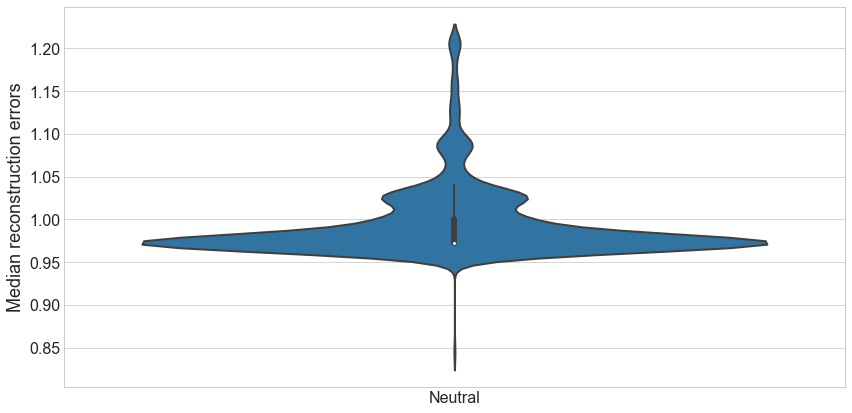

In [22]:
sns.violinplot(data=[neutral_rec_errors]);
plt.ylabel("Median reconstruction errors");
plt.xticks([0], ["Neutral"]);
plt.savefig('./Figures/SAMPLED-MultiSim-Large-1000_sim/SAMPLED-Large-neutral-Rec_errors.png')
plt.show()

## Export data

In [23]:
d = pd.DataFrame()
d["neutral_MaxAFs"] = neutral_MaxAFs
d["neutral_H"] = neutral_H
d["neutral_total_m"] = neutral_total_m
d["neutral_rec_errors"] = neutral_rec_errors

d.to_csv('../Analysis-Data/SAMPLED-Large-neutral-1000_sim-Analyzed_data.csv')